# Italian households' digital culture
## Internet access and online shopping habits



- *1st block*:
    - families and internet access
    - families and type of connection
    - e-commerce
    - online sale/purchase

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from io import StringIO
import os

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

### Households with internet access at home by region (2019)

In [3]:
internet_df = pd.read_csv(os.path.join('data', '1st_block', 'IT_internet_access_households.csv'))
internet_df.head()

,ITTER107,Territory,TIPO_DATO_SDS_ICT,Data type,TIME,Select time,Value,Flag Codes,Flags
0,IT,Italy,FAM_INT_YES,households with internet access at home,2019,2019,76.1,NaN,NaN
1,IT,Italy,FAM_NO_ELSE,have access to internet elsewhere,2019,2019,9.2,NaN,NaN
2,IT,Italy,FAM_NO_USE,"not useful, not interesting",2019,2019,25.5,NaN,NaN
3,IT,Italy,FAM_NO_EQUI,equipment costs too high,2019,2019,7.2,NaN,NaN
4,IT,Italy,FAM_NO_COST,access costs too high,2019,2019,9.3,NaN,NaN


In [4]:
# Households with internet access at home
reg_internet_df = internet_df[internet_df.TIPO_DATO_SDS_ICT.isin(['FAM_INT_YES'])]
# Keep only the regions
#reg_internet_df = reg_internet_df[reg_internet_df.ITTER107.str.len() == 4]
reg_internet_df = reg_internet_df[reg_internet_df.ITTER107.apply(lambda x: len(x)==4 or len(x)==2)]
# Remove special provinces
reg_internet_df = reg_internet_df[~reg_internet_df.ITTER107.isin(['ITD1','ITD2'])]
reg_internet_df = reg_internet_df[['Territory', 'Value']]
reg_internet_df = reg_internet_df.sort_values('Value', ascending = False)
reg_internet_df.reset_index(drop=True, inplace=True)
reg_internet_df

,Territory,Value
0,Trentino Alto Adige / Südtirol,81.1
1,Veneto,80.6
2,Lazio,80.5
3,Lombardia,79.0
4,Emilia-Romagna,79.0
5,Friuli-Venezia Giulia,78.7
6,Umbria,77.4
7,Valle d'Aosta / Vallée d'Aoste,77.4
8,Toscana,77.4
9,Marche,76.7


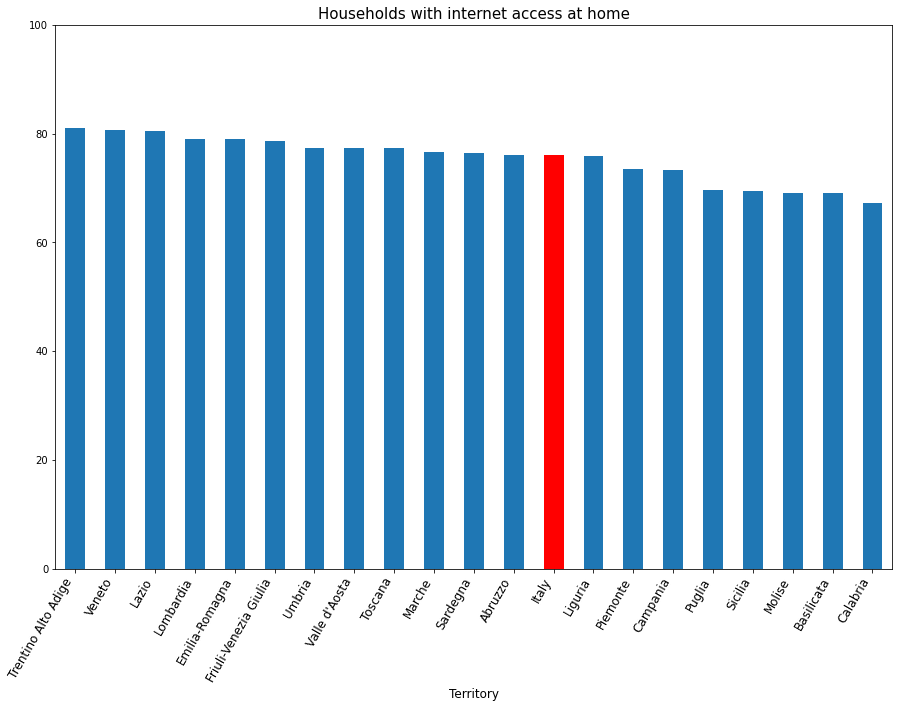

In [5]:
# Shorten region names
reg_internet_df_c = reg_internet_df.copy()
reg_internet_df_c.Territory = reg_internet_df_c.Territory.replace({'Trentino Alto Adige / Südtirol': 'Trentino Alto Adige', "Valle d'Aosta / Vallée d'Aoste": "Valle d'Aosta"})

ax = reg_internet_df_c.plot.bar(legend=False)
ax.set_xlabel("Territory", fontsize=12)
plt.ylim(0, 100)

from textwrap import fill
labels = [fill(l, 23) for l in reg_internet_df_c.Territory]

plt.gca().set_xticklabels(reg_internet_df_c.Territory)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12)
plt.title('Households with internet access at home',fontsize=15)

# Set a different color for Italy
it_pos = reg_internet_df_c[reg_internet_df_c.Territory == 'Italy'].index.item()
ax.patches[it_pos].set_facecolor('r')

plt.show()

In [6]:
map_reg = gpd.read_file(os.path.join('assets', 'maps', 'Reg01012019_g', 'Reg01012019_g_WGS84.shp'))
map_reg['DEN_REG'] = map_reg['DEN_REG'].replace({'Friuli Venezia Giulia': 'Friuli-Venezia Giulia', 'Trentino-Alto Adige': 'Trentino Alto Adige / Südtirol', "Valle d'Aosta": "Valle d'Aosta / Vallée d'Aoste"})
merged = pd.merge(map_reg, reg_internet_df, left_on='DEN_REG', right_on='Territory', how='left')

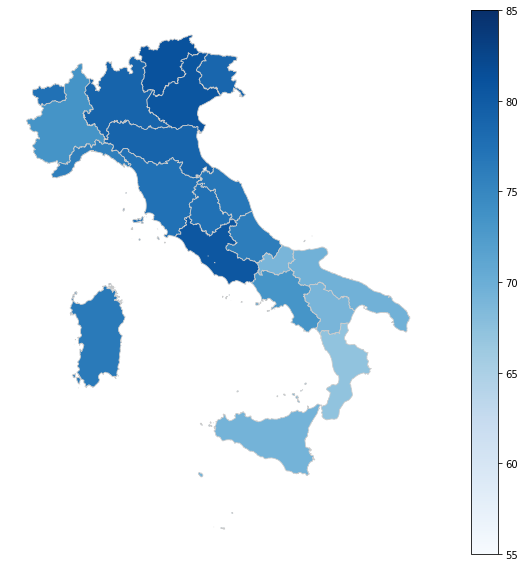

In [7]:
variable = 'Value'
fig, ax = plt.subplots(1)

ax.axis('off')

merged.plot(column=variable, vmin = 55, vmax = 85, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#merged.plot(column=variable, vmin = 55, vmax = 85, cmap='Blues', scheme='equal_interval', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'fontsize': 8})

### Households with internet access at home by age group (2019)

In [8]:
internet_age_df = pd.read_csv(os.path.join('data', '1st_block', 'IT_without_internet_age_reason.csv'))
internet_age_df = internet_age_df.drop(columns=['TIME', 'Select time', 'Flag Codes', 'Flags'])
internet_age_df.head()

,TIPO_DATO_SDS_ICT,Data type,TIP_FAM,Household type,Value
0,FAM_INT_YES,households with internet access at home,HH,all private households,76.1
1,FAM_NO_ELSE,have access to internet elsewhere,HH,all private households,9.2
2,FAM_NO_USE,"not useful, not interesting",HH,all private households,25.5
3,FAM_NO_EQUI,equipment costs too high,HH,all private households,7.2
4,FAM_NO_COST,access costs too high,HH,all private households,9.3


In [9]:
# Split the dataset for the two visualizations
internet_age_p_df = internet_age_df.pivot_table(values='Value', index='Household type', columns='Data type')
no_internet_age_p_df = internet_age_p_df.drop(columns='households with internet access at home')
yes_internet_age_p_df = internet_age_p_df[['households with internet access at home']]

In [10]:
# Create line-wrapped labels for improved visual clarity
from textwrap import fill
household_labels = [fill(l, 23) for l in internet_age_p_df.index]

['all private households', 'households in which\nthere is at least one\nchild  aged 0-17', 'households of only\nmembers 65 years and\nolder', 'other typologies']


In [11]:
yes_internet_age_p_df['households without internet access at home'] = 100 - yes_internet_age_p_df['households with internet access at home']
yes_internet_age_p_df

Data type,households with internet access at home,households without internet access at home
Household type,,
all private households,76.1,23.9
households in which there is at least one child aged 0-17,96.3,3.7
households of only members 65 years and older,35.3,64.7
other typologies,87.1,12.9


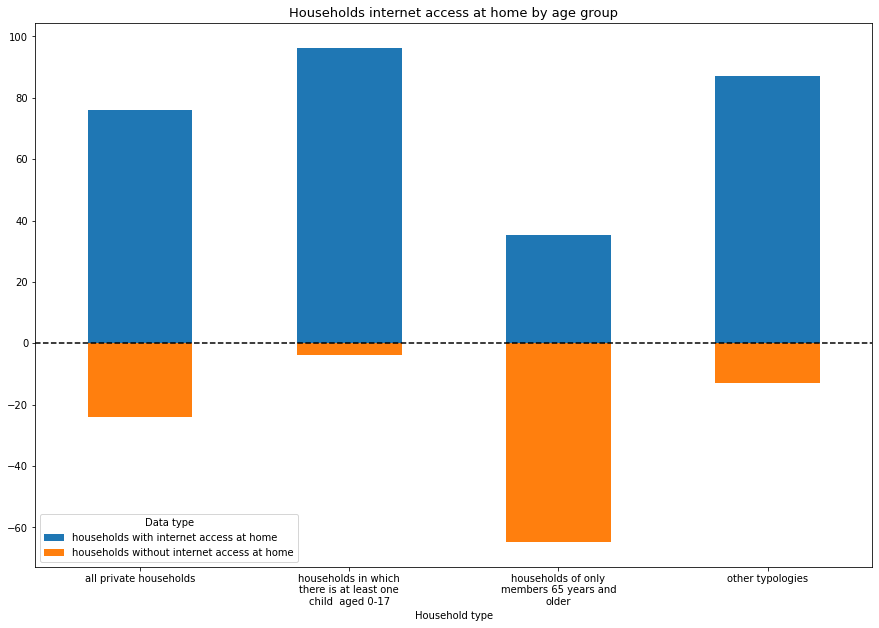

In [25]:
yes_internet_age_p_df['households without internet access at home'] = yes_internet_age_p_df['households without internet access at home'] * (-1)

ax = yes_internet_age_p_df.plot.bar(stacked=True)

plt.title('Households internet access at home by age group',fontsize=13)
plt.xticks(rotation='horizontal')
plt.gca().set_xticklabels(household_labels)

plt.axhline(y=0, color='0', linestyle='--')

plt.show()

### Households without internet access at home by age group and reason (2019)

In [13]:
no_internet_age_p_df['other (e.g. broadband not available, privacy concerns)'] = no_internet_age_p_df['other'] + no_internet_age_p_df['broadband internet not available in our area'] + no_internet_age_p_df['privacy or security concerns']
no_internet_age_p_df.drop(columns=['broadband internet not available in our area', 'privacy or security concerns', 'other'], inplace=True)
no_internet_age_p_df

Data type,"not useful, not interesting",access costs too high,equipment costs too high,have access to internet elsewhere,lack of skills,"other (e.g. broadband not available, privacy concerns)"
Household type,,,,,,
all private households,25.5,9.3,7.2,9.2,56.4,9.1
households in which there is at least one child aged 0-17,10.9,37.8,34.9,20.3,14.6,10.1
households of only members 65 years and older,27.9,4.5,3.2,3.5,68.4,8.0
other typologies,21.4,17.3,13.4,22.6,31.5,12.1


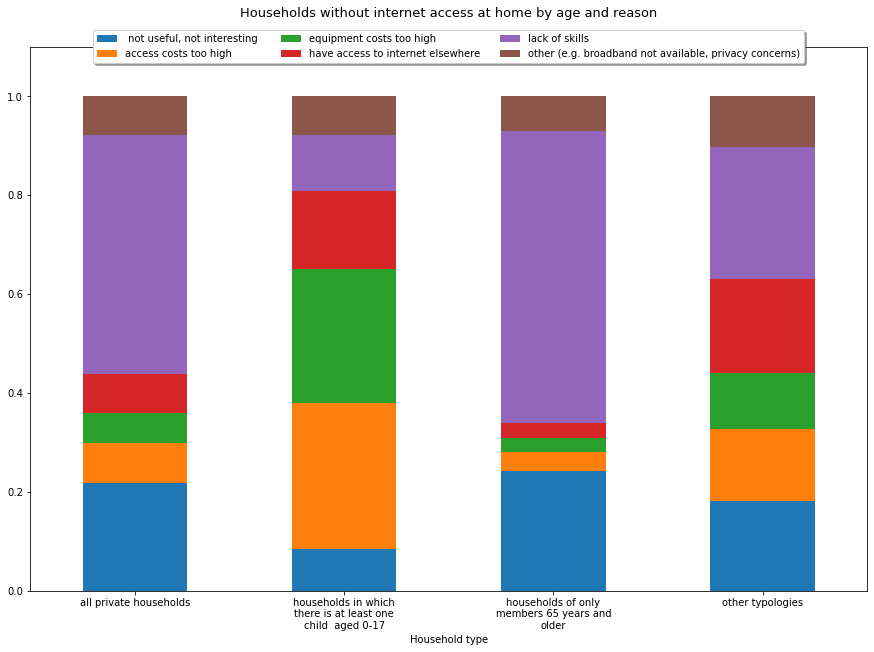

In [19]:
no_internet_age_p_df = no_internet_age_p_df.div(no_internet_age_p_df.sum(1), axis=0)
ax = no_internet_age_p_df.plot.bar(stacked=True)


plt.margins(0.05, 0.1)
plt.title('Households without internet access at home by age and reason',fontsize=13, pad=30)
plt.xticks(rotation='horizontal')
plt.gca().set_xticklabels(household_labels)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.04),
          ncol=3, fancybox=True, shadow=True)

plt.show()

### Households and type of connection

Interazioni con la PA

### Online shopping habits

In [15]:
# Purchases or orders - reg. and type of municipalities
online_purchases_df = pd.read_csv(os.path.join('data', '1st_block', 'IT_purchases_orders.csv'))
online_purchases_df

,ITTER107,Territory,TIPO_DATO_SDS_ICT,Data type,TIME,Select time,Value,Flag Codes,Flags
0,IT,Italy,COMM_3,within the last 3 months,2019,2019,34.8,NaN,NaN
1,IT,Italy,COMM_3_12,between 3 months and a year ago,2019,2019,12.6,NaN,NaN
2,IT,Italy,COMM_12_MORE,more than 1 year ago,2019,2019,9.0,NaN,NaN
3,IT,Italy,COMM_NEVER,never,2019,2019,42.2,NaN,NaN
4,ITC,Nord-ovest,COMM_3,within the last 3 months,2019,2019,40.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...
131,8,"10,001 - 50,000 inhab.",COMM_NEVER,never,2019,2019,43.6,NaN,NaN
132,9,"50,001 inhab. and over",COMM_3,within the last 3 months,2019,2019,34.0,NaN,NaN
133,9,"50,001 inhab. and over",COMM_3_12,between 3 months and a year ago,2019,2019,13.4,NaN,NaN
134,9,"50,001 inhab. and over",COMM_12_MORE,more than 1 year ago,2019,2019,9.6,NaN,NaN


Persone che hanno effettuato acquisti o ordini online nell'ultimo anno

### E-commerce